In [74]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from PIL import ImageColor
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from scipy.signal import argrelextrema
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

rcParams.update({'font.family':'Arial', 'font.size': 14})

In [54]:
N = 256
yel = ImageColor.getcolor("#00487A", "RGB")
yellow = np.ones((N, 4))
yellow[:, 0] = np.linspace(yel[0]/256, 1, N)
yellow[:, 1] = np.linspace(yel[1]/256, 1, N)
yellow[:, 2] = np.linspace(yel[2]/256, 1, N)
yellow_cmp = ListedColormap(yellow)

redd = ImageColor.getcolor("#D31D0D", "RGB")
red = np.ones((N, 4))
red[:, 0] = np.linspace(redd[0]/256, 1, N)
red[:, 1] = np.linspace(redd[1]/256, 1, N)
red[:, 2] = np.linspace(redd[2]/256, 1, N)
red_cmp = ListedColormap(red)

newcolors2 = np.vstack((yellow_cmp(np.linspace(0, 1, 128)),
                       red_cmp(np.linspace(1, 0, 128))))
RdBu_mel_pdl1 = ListedColormap(newcolors2, name='RdBu_mel_pdl1')

In [28]:
def find_minima_in_distribution(gene_values,overall_range,minima_range,accuracy):
    
    density = gaussian_kde(gene_values)
    
    data = []
    
    for i in range(int(overall_range[0]*accuracy),int(overall_range[1]*accuracy)+1):
        data.append(density(i/accuracy)[0])
        
    lb_index = int(abs((overall_range[0]*accuracy)-(minima_range[0]*accuracy)))
    len_minima_range = int((minima_range[1]-minima_range[0])*accuracy)
    
    minima_index = argrelextrema(np.array(data[lb_index:lb_index+len_minima_range]), np.less)
    
    if len(minima_index[0]) == 0:
        return None
    else:
        threshold_value = ((minima_index[0]/accuracy)+minima_range[0])[0]
        #print(overall_range,minima_range,overall_range[0]*accuracy,(overall_range[1]*accuracy)+1,lb_index,lb_index+len_minima_range,data[lb_index],data[lb_index+len_minima_range])
        return threshold_value

In [3]:
replicate_number = "r1"

In [4]:
df = pd.read_csv("./"+replicate_number+"/core_solution.dat", sep = "\t", header = None)
df.columns = ["parameter" ,"stability", "number", "MITF", "JUN", "ZEB1", "SOX10", "SOX9"]

In [5]:
df = df[df["stability"] <= 6]

In [6]:
for col in ["MITF", "JUN", "ZEB1", "SOX10", "SOX9"]:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [7]:
df

,parameter,stability,number,MITF,JUN,ZEB1,SOX10,SOX9,MITF_zscore,JUN_zscore,ZEB1_zscore,SOX10_zscore,SOX9_zscore
0,1,2,38,-19.614602,7.091234,5.364919,-6.034869,7.078208,-2.018529,0.995401,0.669617,-1.529910,1.025193
1,1,2,62,-14.001395,7.091234,-1.257973,-6.034869,7.078208,-1.298969,0.995401,-0.597703,-1.529910,1.025193
2,2,5,44,0.352409,-0.890024,0.053512,-4.220093,6.758090,0.541051,-0.523673,-0.346745,-1.185247,0.925135
3,2,5,17,-7.289990,0.383003,6.737750,-4.220092,6.758090,-0.438631,-0.281378,0.932314,-1.185247,0.925135
4,2,5,15,-7.560121,6.468047,0.665895,-4.220093,6.758090,-0.473259,0.876790,-0.229562,-1.185247,0.925135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,9999,2,22,2.817774,-1.272999,-5.330730,-7.892726,6.333756,0.857088,-0.596565,-1.377043,-1.882755,0.792503
33776,10000,4,40,3.493589,-2.871464,-1.977925,-4.320778,7.128836,0.943721,-0.900801,-0.735469,-1.204369,1.041018
33777,10000,4,46,-12.369755,7.258896,5.325332,-4.320778,7.128836,-1.089808,1.027312,0.662042,-1.204369,1.041018
33778,10000,4,5,-7.771569,7.258896,5.325332,6.192489,1.750977,-0.500365,1.027312,0.662042,0.792315,-0.639917


0.3340000000000001


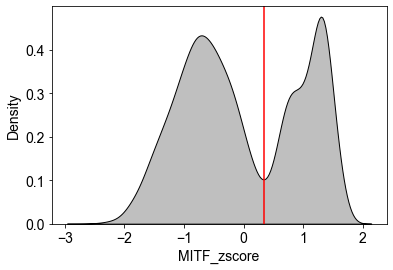

In [21]:
name = "MITF_zscore"

sns.kdeplot(df[name], fill=True, color = "black")
thres = find_minima_in_distribution(df[name],[-3,2],[-1,1],1000)
print(thres)
plt.axvline(x = thres, color="red")

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


SpearmanrResult(correlation=-0.8372348352172042, pvalue=0.0)


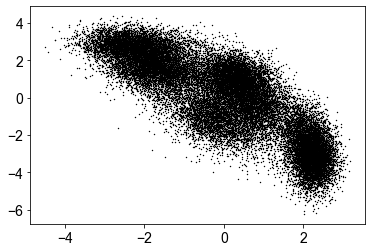

In [131]:
x = (df["MITF_zscore"]+df["SOX10_zscore"])
y = (df["SOX9_zscore"]+df["JUN_zscore"]+df["ZEB1_zscore"])
sns.scatterplot(x, y, linewidth=0, color="black", s = 2)
print(ss.spearmanr(x,y))
plt.savefig("IP_scatterplot.png", dpi=800)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


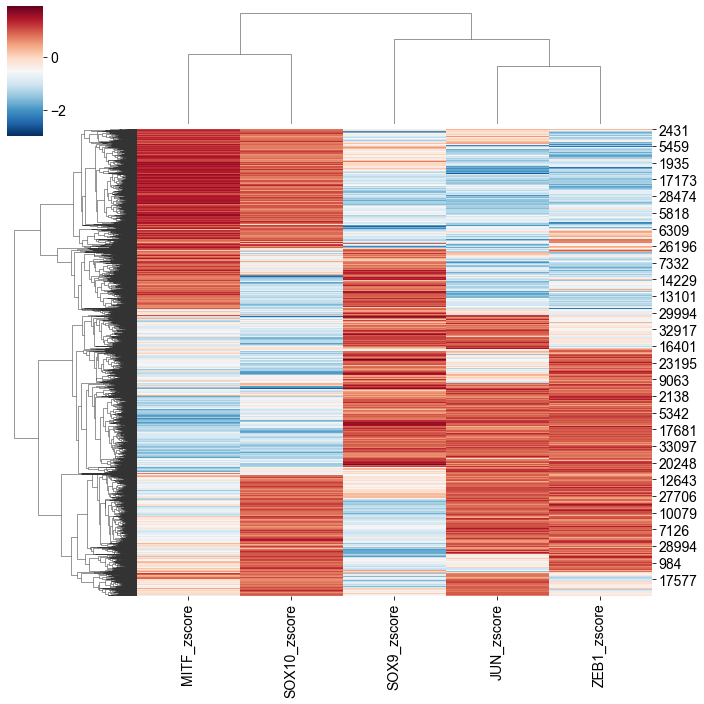

In [132]:
df_zscores = df[["MITF_zscore","SOX10_zscore","SOX9_zscore","JUN_zscore","ZEB1_zscore"]]
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#D31D0D","#00487A"])
sns.clustermap(df_zscores, cmap="RdBu_r")
plt.savefig("Heatmap.png", dpi=800)

In [94]:
df_zscores = df[["MITF_zscore","SOX10_zscore","SOX9_zscore","JUN_zscore","ZEB1_zscore"]]
data_scaled = normalize(df_zscores)
data_scaled = pd.DataFrame(data_scaled, columns=df_zscores.columns)

In [110]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 3, ..., 1, 2, 0], dtype=int64)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


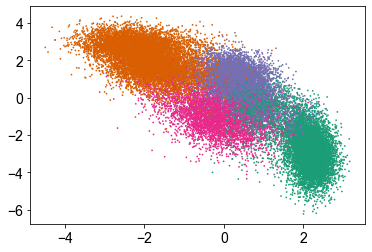

In [134]:
df_zscores["cluster_labels"] = cluster.labels_
x = (df_zscores["MITF_zscore"]+df_zscores["SOX10_zscore"])
y = (df_zscores["SOX9_zscore"]+df_zscores["JUN_zscore"]+df_zscores["ZEB1_zscore"])
sns.scatterplot(x, y, linewidth=0, s = 3, hue = df_zscores["cluster_labels"], palette = "Dark2")
plt.legend('',frameon=False)
plt.savefig("Scatter_cluster.png", dpi=800)

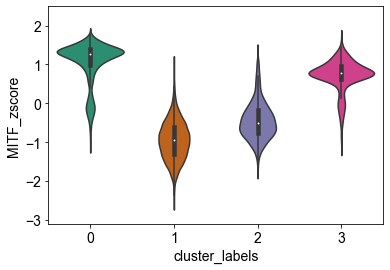

In [146]:
ax = sns.violinplot(data=df_zscores,x="cluster_labels",y="MITF_zscore",palette="Dark2")
plt.ylim([-3.1,2.5])
plt.savefig("MITF.png", dpi=800)

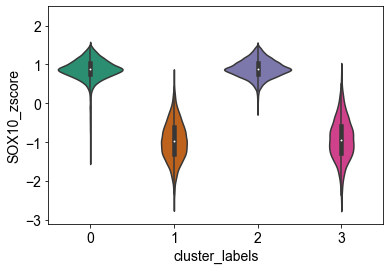

In [147]:
ax = sns.violinplot(data=df_zscores,x="cluster_labels",y="SOX10_zscore",palette="Dark2")
plt.ylim([-3.1,2.5])
plt.savefig("SOX10.png", dpi=800)

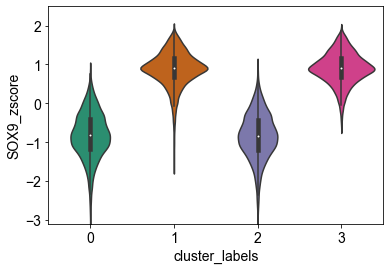

In [148]:
ax = sns.violinplot(data=df_zscores,x="cluster_labels",y="SOX9_zscore",palette="Dark2")
plt.ylim([-3.1,2.5])
plt.savefig("SOX9.png", dpi=800)

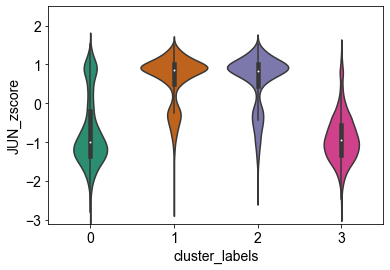

In [149]:
ax = sns.violinplot(data=df_zscores,x="cluster_labels",y="JUN_zscore",palette="Dark2")
plt.ylim([-3.1,2.5])
plt.savefig("JUN.png", dpi=800)

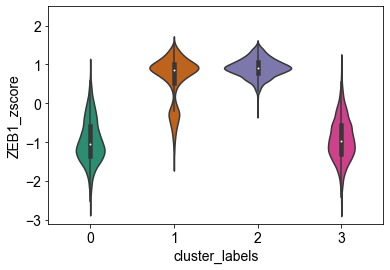

In [150]:
ax = sns.violinplot(data=df_zscores,x="cluster_labels",y="ZEB1_zscore",palette="Dark2")
plt.ylim([-3.1,2.5])
plt.savefig("ZEB1.png", dpi=800)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


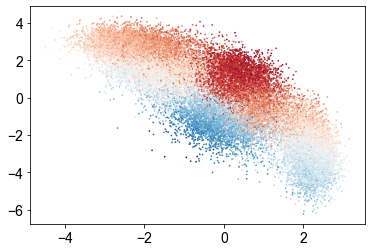

In [144]:
sns.scatterplot(df["MITF_zscore"]+df["SOX10_zscore"], df["SOX9_zscore"]+df["JUN_zscore"]+df["ZEB1_zscore"], linewidth=0, hue=df["ZEB1_zscore"]+df["JUN_zscore"]+df["SOX10_zscore"], s = 3, palette = "RdBu_r")
plt.legend('',frameon=False)
plt.savefig("Neural_crest.png", dpi=800)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


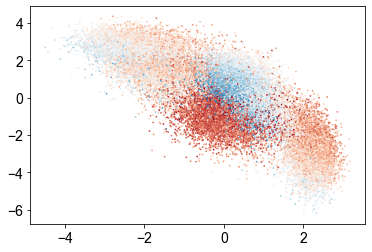

In [145]:
sns.scatterplot(df["MITF_zscore"]+df["SOX10_zscore"], df["SOX9_zscore"]+df["JUN_zscore"]+df["ZEB1_zscore"], linewidth=0, hue=df["MITF_zscore"]+df["SOX9_zscore"], s = 3, palette = "RdBu_r")
plt.legend('',frameon=False)
plt.savefig("Intermediate.png", dpi=800)